#Project 2 - Arrest Data

####Analyze NYPD arrest data:
1. Pick a subset of total dataset (ZIP code, neighborhood, district, etc.)
2. Pick a feature
3. Compare to a different entity

Include:
- descriptive statistics
- data cleaning
- visualizations


###Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Crime data URL
url = 'https://data.cityofnewyork.us/Public-Safety/NYPD-Arrest-Data-Year-to-Date-/uip8-fykc'

In [10]:
# Importing data filtered from above website
# NOTE: Pre-filtered data before importing in order to decrease the size of the .csv files.
#       All .csv files include data from the 114th precinct in Queens (the precicnt that serves my neighborhood).
df_2019 = pd.read_csv('/content/drive/MyDrive/07 - LaGuardia ACE Data Analytics/02 - Python for Data Analytics - Fall 2022 A/misc/Project2 - Data/NYPD_Arrests_2019.csv')
df_2020 = pd.read_csv('/content/drive/MyDrive/07 - LaGuardia ACE Data Analytics/02 - Python for Data Analytics - Fall 2022 A/misc/Project2 - Data/NYPD_Arrests_2020.csv')
df_2021 = pd.read_csv('/content/drive/MyDrive/07 - LaGuardia ACE Data Analytics/02 - Python for Data Analytics - Fall 2022 A/misc/Project2 - Data/NYPD_Arrests_2021.csv')
df_2022 = pd.read_csv('/content/drive/MyDrive/07 - LaGuardia ACE Data Analytics/02 - Python for Data Analytics - Fall 2022 A/misc/Project2 - Data/NYPD_Arrests_Year_to_Date_2022.csv')

###Data Cleaning

In [11]:
# Columns match; seemingly big differences in number of arrests reported each year (2022 is only 9 months)
print(f'2019: {df_2019.shape}\n2020: {df_2020.shape}\n2021: {df_2021.shape}\n2022: {df_2022.shape}')

2019: (3566, 19)
2020: (2659, 19)
2021: (3462, 19)
2022: (3023, 19)


In [12]:
list(df_2019.columns)

# Field names and explanations from dataset documentation:

# ARREST_KEY        = Unique ID
# ARREST_DATE       = date of reported event
# PD_CD             = internal classification code (granular)
# PD_DESC           = description of corresponding code
# KY_CD             = internal classification code (general)
# OFNS_DESC         = description of corresponding code
# LAW_CODE          = NYS Penal Law classification code
# LAW_CAT_CD        = level of offense (felony, misdemeanor, violation)
# ARREST_BORO       = prefiltered - Q(Queens) only
# ARREST_PRECINCT   = prefiltered - 114
# JURISDICTION_CODE = NYPD Jurisdictions (0-Patrol, 1-Transit, 2-Housing), Non-NYPD (3+)
# AGE_GROUP         = perpetrator's age
# PERP_SEX          = perpetrator's gender
# PERP_RACE         = perpetrator's race description
# X_COORD_CD        = NYS Plane Coordinate System
# Y_COORD_CD        = NYS Plane Coordinate System
# Latitude          = GCS, WGS 1984
# Longitude         = GCS, WGS 1984
# Lon_Lat           = concatenation of the previous 2 features

['ARREST_KEY',
 'ARREST_DATE',
 'PD_CD',
 'PD_DESC',
 'KY_CD',
 'OFNS_DESC',
 'LAW_CODE',
 'LAW_CAT_CD',
 'ARREST_BORO',
 'ARREST_PRECINCT',
 'JURISDICTION_CODE',
 'AGE_GROUP',
 'PERP_SEX',
 'PERP_RACE',
 'X_COORD_CD',
 'Y_COORD_CD',
 'Latitude',
 'Longitude',
 'Lon_Lat']

In [13]:
# Created a list to loop through for repetitive tasks for each df
dfs = [df_2019, df_2020, df_2021, df_2022]

In [14]:
# Drop redundant columns
for df in dfs:
  df.drop(['ARREST_BORO', 'ARREST_PRECINCT', 'Latitude', 'Longitude'], axis=1, inplace=True)

In [15]:
# Verify
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3566 entries, 0 to 3565
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ARREST_KEY         3566 non-null   int64  
 1   ARREST_DATE        3566 non-null   object 
 2   PD_CD              3566 non-null   int64  
 3   PD_DESC            3563 non-null   object 
 4   KY_CD              3563 non-null   float64
 5   OFNS_DESC          3563 non-null   object 
 6   LAW_CODE           3566 non-null   object 
 7   LAW_CAT_CD         3546 non-null   object 
 8   JURISDICTION_CODE  3566 non-null   int64  
 9   AGE_GROUP          3566 non-null   object 
 10  PERP_SEX           3566 non-null   object 
 11  PERP_RACE          3566 non-null   object 
 12  X_COORD_CD         3566 non-null   int64  
 13  Y_COORD_CD         3566 non-null   int64  
 14  Lon_Lat            3566 non-null   object 
dtypes: float64(1), int64(5), object(9)
memory usage: 418.0+ KB


####Key Feature - Age Group
I'm curious to see if the pandemic caused a spike in arrests of school-aged kids (in this case, the 1-18 y/o age group)

**Hypothesis:** The pandemic caused a huge disruption in the routine of NYC school kids resulting in an increase in serious arrests (compared to pre-pandemic numbers).

In [16]:
df_2019['AGE_GROUP'].value_counts().sort_index()
# Let's move the last group into it's sequential position (at the top)

18-24     769
25-44    2051
45-64     574
65+        48
<18       124
Name: AGE_GROUP, dtype: int64

In [17]:
# Renaming '<18' to '1-18'
for df in dfs:
  df['AGE_GROUP'].replace('<18', '1-18', inplace=True)

In [18]:
# Verify
for df in dfs:
  print(df.AGE_GROUP.value_counts().sort_index())

1-18      124
18-24     769
25-44    2051
45-64     574
65+        48
Name: AGE_GROUP, dtype: int64
1-18       50
18-24     551
25-44    1502
45-64     521
65+        35
Name: AGE_GROUP, dtype: int64
1-18       47
18-24     677
25-44    2029
45-64     674
65+        35
Name: AGE_GROUP, dtype: int64
1-18       73
18-24     534
25-44    1890
45-64     491
65+        35
Name: AGE_GROUP, dtype: int64


In [31]:
# Filter out less serious traffic arrests (include only misdemeanors and felonies)
df_2019_serious = df_2019[(df_2019['LAW_CAT_CD'] == 'M') | (df_2019['LAW_CAT_CD'] == 'F')]
df_2020_serious = df_2020[(df_2020['LAW_CAT_CD'] == 'M') | (df_2020['LAW_CAT_CD'] == 'F')]
df_2021_serious = df_2021[(df_2021['LAW_CAT_CD'] == 'M') | (df_2021['LAW_CAT_CD'] == 'F')]
df_2022_serious = df_2022[(df_2022['LAW_CAT_CD'] == 'M') | (df_2022['LAW_CAT_CD'] == 'F')]

In [59]:
# Create a new list of 'serious' dataframes to loop over
dfs_serious = {'df_2019_serious':df_2019_serious, 'df_2020_serious':df_2020_serious, 
               'df_2021_serious':df_2021_serious, 'df_2022_serious':df_2022_serious}

In [74]:
# Number of serious arrests by year in the 114th precinct
for df in dfs_serious:
  print(dfs_serious[df].shape[0])

3468
2609
3426
2962


In [57]:
# FOR REFERENCE: total number of arrests by year in the 114th precinct
for df in dfs:
  print(df.shape[0])

3566
2659
3462
3023


###Descriptive Statistics

In [19]:
df_2019.head(3)

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Lon_Lat
0,206009619,12/04/2019,440,NaN,NaN,NaN,PL 1553502,F,0,1-18,M,WHITE,1009988,221743,POINT (-73.90707361899996 40.77528038400004)
1,194164531,03/01/2019,177,SEXUAL ABUSE,116.0,SEX CRIMES,PL 1306501,F,0,25-44,M,BLACK,1007654,219564,POINT (-73.91550817999996 40.769306087000075)
2,203738719,10/15/2019,101,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,0,25-44,M,BLACK,1007694,219657,POINT (-73.91536344699995 40.769561242000066)


###Visualizations

In [79]:
serious = pd.concat(dfs_serious)
arrests = pd.concat(dfs)

In [81]:
serious.shape

(12465, 16)

In [86]:
# Add a 'YEAR' column for visualizations
serious['YEAR'] = serious['ARREST_DATE'].str.strip().str[-4:].astype(int)

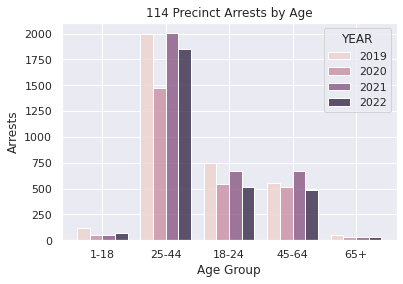

In [104]:
# Show the year-over-year change in serious arrests by age group
sns.set(style="darkgrid")
plt.title('114 Precinct Arrests by Age')
plt.xlabel('Age Group')
plt.ylabel('Arrests')
sns.histplot(data=serious, x='AGE_GROUP', hue='YEAR', multiple='dodge', shrink=.8);

###**Conclusion:**

As expected, there was a big decrease in arrests year-over-year from 2019 to 2020. However, arrest numbers climbed back up to pre-pandemic levels in most age groups except the youngest and oldest. 

Furthermore, considering we only have data for 3/4 of 2022, the fact that the number of arrests for those under 18yo is already higher than 2021 numbers indicates that there was seemingly an increase in serious criminal activity among this age group.